# Comparison between Bia's binned Ifremer 1 swh product and my binned Ifremer 1 swh product (Validation method for checking if my binning program is correct)

Plot figure within jupyter notebook

In [1]:
%matplotlib inline

Use the sys library in order to tell the notebook to look for files within the followinf directory path: 

In [2]:
import sys
sys.path.append('/zdata/home/lcolosi/python_functions/')

Import all libraries and functions

In [3]:
#libraries
import numpy as np #contains the major of functions used for matrix arrays  
import matplotlib.pyplot as plt # matplotlib contains functions for graphics and plot manipulation
from netCDF4 import Dataset, num2date # netCDF4 handles netCDF files
import cmocean.cm as cmo
from matplotlib import cm 
import cartopy 
import cartopy.crs as ccrs


Call Bia's Ifremer Product 1 swh binned daily data

In [4]:
filename1 = '/zdata/downloads/colosi_data_bk/binned_data/ifremer_p1_daily_data/bia_daily_binned_ifremer_data/all_sat_binned_swh_1992-08-23_2016-08-23.nc'

#set nc variable in order to read attributes and obtained data: 
nc1 = Dataset(filename1, 'r')

#print key variables:
print(nc1.variables.keys())
print('')

#look at bia's attriutes for her data:
#longitude
for at in nc1.variables['lon'].ncattrs():
    print("%s : %s" %(at, nc1.variables['lon'].getncattr(at)))
print('')
#laitude
for at in nc1.variables['lat'].ncattrs():
    print("%s : %s" %(at, nc1.variables['lat'].getncattr(at)))
print('')
#time 
for at in nc1.variables['time'].ncattrs():
    print("%s : %s" %(at, nc1.variables['time'].getncattr(at)))
print('')
#swhcor
for at in nc1.variables['swhcor'].ncattrs():
    print("%s : %s" %(at, nc1.variables['swhcor'].getncattr(at)))

#call swh and time data:
swh_bia = nc1.variables['swhcor'][:]
lon_bia = nc1.variables['lon'][:]
lat_bia = nc1.variables['lat'][:]
time_bia = num2date(nc1.variables['time'][:], nc1.variables['time'].units) 

print(lon_bia)
print(lat_bia)

odict_keys(['lat', 'lon', 'time', 'swh', 'swhcor', 'N'])

long_name : longitude in degrees east
units : degrees_east
add_offset : 0.0
scale_factor : 0.01
valid_range : [    0. 36000.]

long_name : latitude in degrees north
units : degrees_north
add_offset : 0.0
scale_factor : 0.01
valid_range : [-9000.  9000.]

long_name : time
units : days since 1900-1-1 0:0:0
add_offset : 0.0
scale_factor : 1.0
valid_range : [     0. 401767.]

long_name : sea_surface_wave_significant_height_corrected
units : m
add_offset : 0.0
scale_factor : 0.01
valid_range : [   0. 2500.]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  8

Call luke's Ifremer Product 1 swh binned daily data

In [5]:
filename = '/zdata/downloads/colosi_data_bk/binned_data/ifremer_p1_daily_data/my_daily_binned_ifremer_data/ifremer_swh_daily_binned_data_93_16_bia.nc'

#set nc variable in order to read attributes and obtained data: 
nc = Dataset(filename, 'r')

#print key variables:
print(nc.variables.keys())

#Call swh 
swh_luke = nc.variables['swh'][:]
lon_luke = nc.variables['lon'][:]
lat_luke = nc.variables['lat'][:]
time_luke = num2date(nc.variables['time'][:], nc.variables['time'].units) #convert time directly into datetime format instead of integer value time 

print(lon_luke)
print(lat_luke)


odict_keys(['time', 'lon', 'lat', 'swh'])
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188.

Call data from the year 1994 for both data sets: 

In [10]:
#set year that will be called: 
year = 2015
month = 12
day = 31

#target = datetime.datetime(2015,12,31)
#time_bia == target

#set indices for the year for each 2D array in bia and my binned data: 
years_bia = np.array([y.year for y in time_bia])
years_luke = np.array([y.year for y in time_luke])
months_bia = np.array([m.month for m in time_bia])
months_luke = np.array([m.month for m in time_luke])
days_bia = np.array([d.day for d in time_bia])
days_luke = np.array([d.day for d in time_luke])

#find indices: 
ind_bia_y = years_bia == year 
ind_luke_y = years_luke == year 
ind_bia_m = months_bia == month
ind_luke_m = months_luke == month
ind_bia_d = days_bia == day
ind_luke_d = days_luke == day
ind_bia1 = ind_bia_y*ind_bia_m
ind_bia = ind_bia1*ind_bia_d
ind_luke1 = ind_luke_y*ind_luke_m 
ind_luke = ind_luke1*ind_luke_d

#apply indices:
swh_bia_y = swh_bia[ind_bia,:,:]
swh_luke_y = swh_luke[ind_luke,24:157,:]

print(time_bia[ind_bia], time_luke[ind_luke])
print(swh_bia_y.shape,swh_luke_y.shape)

[datetime.datetime(2015, 12, 31, 0, 0)] [datetime.datetime(2015, 12, 31, 0, 0)]
(1, 133, 360) (1, 133, 360)


Set all the NaN values in my data set to masked points

In [7]:
swh_luke_y = np.ma.masked_invalid(swh_luke_y)

Plot a scatter diagram to compare the binned data

(9614,) (9614,)


Text(0.5, 1.0, 'Luke Binned Data histogram')

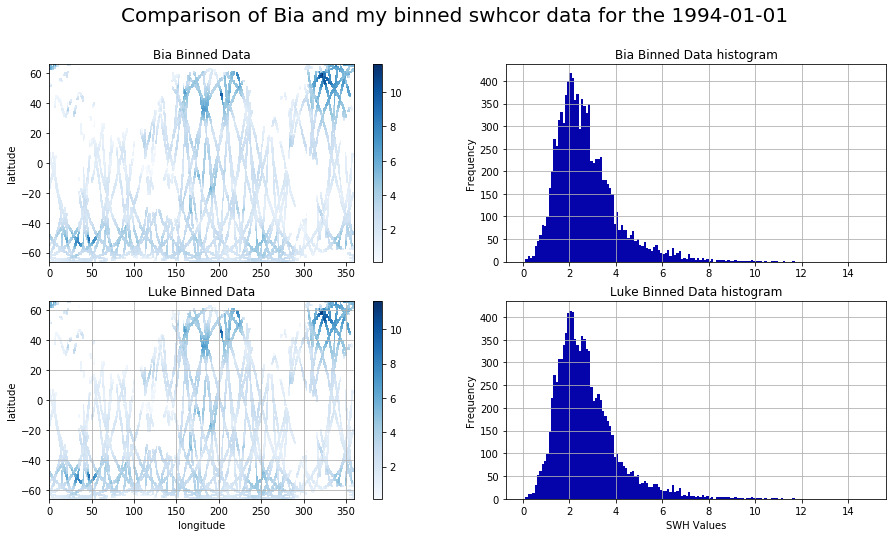

In [13]:
#flatten both arrays:
swh_bia_f = swh_bia_y.compressed() 
swh_luke_f = swh_luke_y.compressed()

print(swh_bia_f.shape, swh_luke_f.shape)

#plot
plt.figure(figsize=(15,8))
plt.suptitle('Comparison of Bia and my binned swhcor data for the 1994-01-01', fontsize = 20)
#plt.scatter(swh_bia_f, swh_luke_f, c='#0504aa', alpha=1)

plt.subplot(221)
plt.pcolor(lon_bia,lat_bia,np.squeeze(swh_bia_y),cmap = cm.Blues)
plt.ylabel('latitude')
cbar = plt.colorbar()
plt.title('Bia Binned Data')

#plot histogram:
plt.subplot(222)
plt.hist(swh_bia_f, bins=np.arange(0,15,0.1), color='#0504aa', alpha=1, rwidth=1)
plt.ylabel('Frequency')
plt.grid()
plt.title('Bia Binned Data histogram')

plt.subplot(223)
plt.pcolor(lon_bia,lat_bia,np.squeeze(swh_luke_y),cmap = cm.Blues)
#plt.xlabel('Bia binned swhcor data')
#plt.ylabel('Luke binned swhcor data')
plt.xlabel('longitude')
plt.ylabel('latitude')
cbar = plt.colorbar()
plt.grid()
plt.title('Luke Binned Data')

#plot histogram
plt.subplot(224)
plt.hist(swh_luke_f, bins=np.arange(0,15,0.1), color='#0504aa', alpha=1, rwidth=1)
plt.xlabel('SWH Values')
plt.ylabel('Frequency')
plt.grid()
plt.title('Luke Binned Data histogram')

Kolmogorov–Smirnov test (ks test) for comparing histograms to see if the samples are from the same pop

Conclusion from comparison results: 

1) Our two binned data proucts are different in the following ways: 

    a) Number of points binned in a given day (hence, not able to do a scatter plot)
    b) Values are not the same 

Scatter plot: 

(47880,) (47880,)


Text(0, 0.5, 'Luke Binned Data')

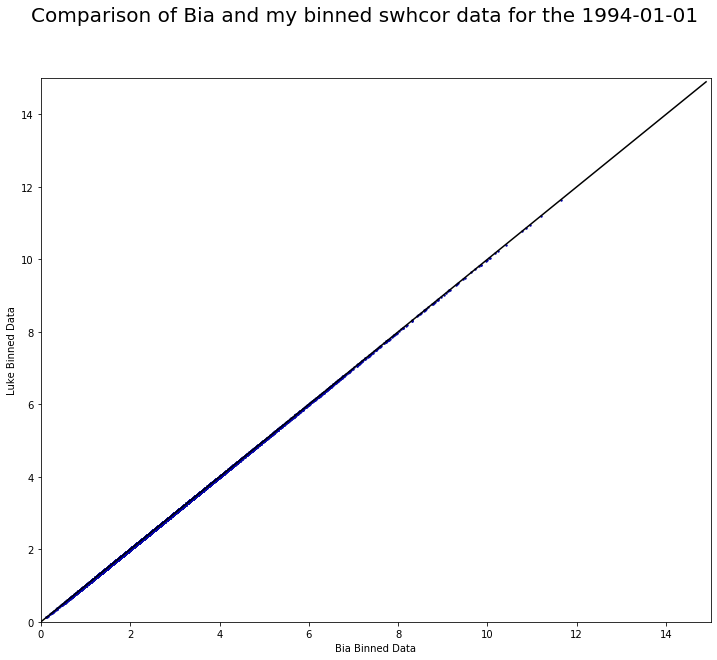

In [14]:
#look at the points on my binned data that are not masked on bia's data:
#swh_bia_y.mask = swh_luke_y.mask 

#plot scatter diagram:

#flatten both arrays:
swh_bia_f = swh_bia_y.flatten() 
swh_luke_f = swh_luke_y.flatten()

print(swh_bia_f.shape, swh_luke_f.shape)

#plot
plt.figure(figsize=(12,10))
plt.suptitle('Comparison of Bia and my binned swhcor data for the 1994-01-01',fontsize = 20)
plt.scatter(swh_bia_f, swh_luke_f, c='#0504aa', s = 2, alpha=1)
plt.plot(np.arange(0,15,0.1),np.arange(0,15,0.1),'k')
plt.xlim(left = 0, right = 15)
plt.ylim(bottom = 0, top = 15)
plt.xlabel('Bia Binned Data')
plt.ylabel('Luke Binned Data')


Next, I need to find where these point are geographically and temporally 

Call data from on time series from each data set and plot the data to see if there is a certain time step where the data varies

Text(0, 0.5, 'swh [m]')

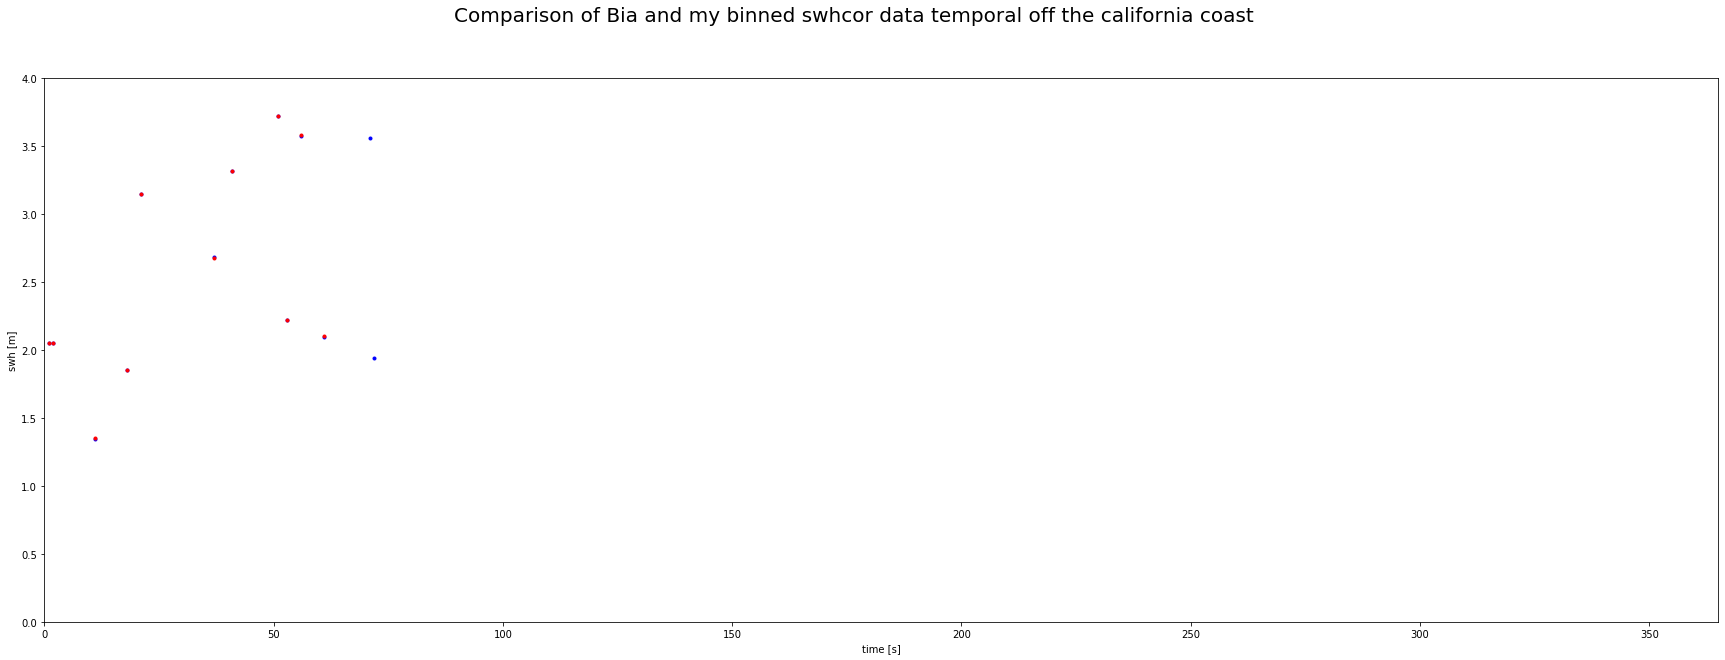

In [26]:
#bia's
#ind_b = np.where(ind_bia)
#ind_l = np.where(ind_luke)
swh_bia_ts = swh_bia[131:200,30,200]
#luke's
swh_luke_ts = swh_luke[0:80,54,200]

#size of data
#ind_mb = swh_bia_ts.mask
#ind_ml = swh_luke_ts.mask
#ind_ml = np.isnan(swh_luke_ts)
#print(swh_bia_ts[~ind_mb].shape, swh_luke_ts[~ind_ml].shape)

#set all masked values to zero:
#swh_bia_ts[ind_mb] = 0
#swh_luke_ts[ind_ml] = 0

#plot data
#plot
plt.figure(figsize=(30,10))
plt.suptitle('Comparison of Bia and my binned swhcor data temporal off the california coast',fontsize = 20)
plt.plot(np.arange(len(swh_luke_ts)),swh_luke_ts,'.b' )
plt.plot(np.arange(len(swh_bia_ts)),swh_bia_ts,'.r')
plt.xlim(left = 0, right = 365)
plt.ylim(bottom = 0, top = 4)
plt.xlabel('time [s]')
plt.ylabel('swh [m]')

In [ ]:
t = np.where(ind_bia)
print(t[0][0])

Next look geographically where the data is missing from one data set to another: 

Plot the number of observations binned in one day

In [ ]:
n_bia_y = swh_bia_n[ind_bia_q,:,:]

#plot 
plt.figure(figsize=(15,10))
plt.suptitle('Comparison of Bia and my binned swhcor data for the 1994-01-01', fontsize = 20)

plt.subplot(311)
plt.pcolor(lon_bia,lat_bia,np.squeeze(n_bia_y),cmap = cm.plasma, vmin=0, vmax=40)
plt.ylabel('latitude')
cbar = plt.colorbar()
plt.title('Bia Binned Data')

plt.subplot(312)
plt.pcolor(lon_bia,lat_bia,n_luke_c,cmap = cm.plasma, vmin=0, vmax=40)
plt.ylabel('latitude')
cbar = plt.colorbar()
plt.title('Luke Binned Data')


plt.subplot(313)
plt.pcolor(lon_bia,lat_bia,n_luke_c - np.squeeze(n_bia_y),cmap = cm.seismic, vmin=-20, vmax=20)
plt.ylabel('latitude')
cbar = plt.colorbar()
plt.title('Difference between number of Binned Data')

Next, average both data sets temporally for the entire time series to see if there are any major difference (indication of systematic error) or they are very similar (random error which is averaged over) 

In [ ]:
#check the types of arrays for binned data: 
print(type(swh_bia))
print(swh_bia.shape)
print(time_bia[0])
print(type(swh_luke))
print(swh_luke.shape)
print(time_luke[-1])

In [ ]:
#Import temporal average function 
from mean_temporal_masked_data import mean_mask_t

#find indices of time to average from Jan 1st, 1993 to Dec 31st, 2015
ind_i = np.nonzero(time_bia == time_luke[0])
ind_f = np.nonzero(time_bia == time_luke[-367])
ind_luke = np.where(time_luke == time_luke[-367])
ind_i = ind_i[0]
ind_f = ind_f[0]
ind_luke = ind_luke[0]

#appy indices
swh_bia_c = swh_bia[ind_i[0]:ind_f[0],:,:]
swh_luke_c = swh_luke[:ind_luke[0],:,:]


#average both binned data sets 
bia_average = mean_mask_t(data = swh_bia_c) 
luke_average = mean_mask_t(data = swh_luke_c)


Plot average for both data sets

In [ ]:
#plot
plt.figure(figsize=(15,8))
plt.suptitle('Comparison of Averaged Bia and my binned swhcor data from Jan 1st, 1993 to Dec 31st, 2015', fontsize = 20)

#plot bia's data
plt.subplot(211)
plt.pcolor(lon_bia,lat_bia,bia_average,cmap = cm.Blues, vmin=0, vmax=4)
plt.ylabel('latitude')
cbar = plt.colorbar()
plt.title('Bia Binned Data')

#plot my data:
plt.subplot(212)
plt.pcolor(lon_luke,lat_luke,luke_average,cmap = cm.Blues, vmin=0, vmax=4)
plt.xlabel('longitude')
plt.ylabel('latitude')
cbar = plt.colorbar()
plt.title('Luke Binned Data')

Plot a scatter plot

In [ ]:
#print out entire array 
import sys
np.set_printoptions(threshold=sys.maxsize)

#set all masked values for each data set equal to each other:
bia_average.mask =luke_average.mask 

#check sizes of data:
#print(bia_average)
#print(luke_average)

#flatten both arrays:
swh_bf = bia_average.compressed() 
swh_lf = luke_average.compressed()

print(swh_bf.shape, swh_lf.shape)

#consider only non-nan values 
inan_b = ~np.isnan(swh_bf)
inan_l = ~np.isnan(swh_lf)
inan = inan_b*inan_l



#plot
plt.figure(figsize=(12,10))
plt.suptitle('Comparison of Bia and my binned swhcor data for the 1994-01-01',fontsize = 20)
plt.scatter(swh_bf, swh_lf, c='#0504aa', s = 2, alpha=1)
#plt.hist2d(swh_bf[inan], swh_lf[inan], bins = 100)
plt.plot(np.arange(0,10,0.1),np.arange(0,10,0.1),'k')
plt.xlim(left = 0, right = 6)
plt.ylim(bottom = 0, top = 6)
plt.xlabel('Bia Binned Data')
plt.ylabel('Luke Binned Data')

### Development Code: 

In [ ]:
swh_bia.shape

In [ ]:
x = 3
x += 10
print(x)

In [ ]:
print(time_luke[-365])
ind_i = time_luke[0] == time_bia
ind_f = time_luke[-367] == time_bia
print(time_bia[ind_i], time_bia[ind_f])
print(ind_i, ind_f)
#swh_bia[ind_i:ind_f,:,:]

ind_i = np.nonzero(time_bia == time_luke[0])
ind_f = np.nonzero(time_bia == time_luke[-367])
ind_luke = np.where(time_luke == time_luke[-367])
print(ind_i[0],ind_f[0])
ind_i = ind_i[0]
ind_f = ind_f[0]
ind_luke = ind_luke[0]
swh_bia_c = swh_bia[ind_i[0]:ind_f[0],:,:]
swh_luke_c = swh_luke[:ind_luke[0],:,:]

print(swh_bia_c.shape, swh_luke_c.shape)

In [ ]:
ind_test = np.where(time_bia == time_luke[-])
print(ind_test[0])
t = ind_test[0]
print(t[0])

In [ ]:
x = 3 
y = x
print(y)

August 14, Wednesday at 12

In [12]:
lat_luke[24:157]

masked_array(data=[-66., -65., -64., -63., -62., -61., -60., -59., -58.,
                   -57., -56., -55., -54., -53., -52., -51., -50., -49.,
                   -48., -47., -46., -45., -44., -43., -42., -41., -40.,
                   -39., -38., -37., -36., -35., -34., -33., -32., -31.,
                   -30., -29., -28., -27., -26., -25., -24., -23., -22.,
                   -21., -20., -19., -18., -17., -16., -15., -14., -13.,
                   -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
                    -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,
                     6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
                    15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
                    24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
                    33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
                    42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
                    51.,  52.,  53.,  54.,  55.,  5